In [2]:
# Import libraries
import numpy as np

import torch
import torch.nn.functional
import torch.utils.data
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.ioff()  # 対話モードを無効にする

# Warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from func import normalize
from SCM4 import SCM4

  0%|          | 0/5 [00:00<?, ?it/s]

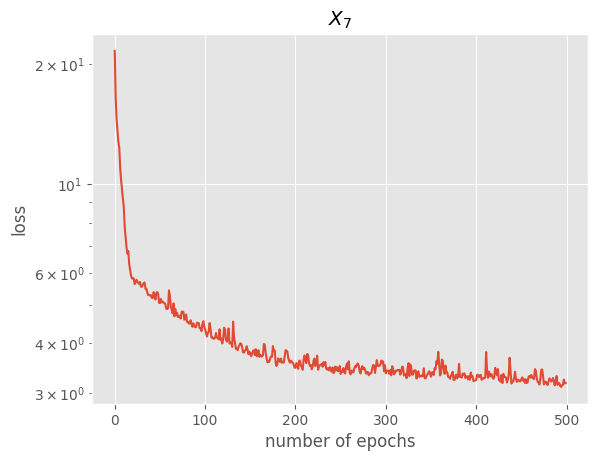

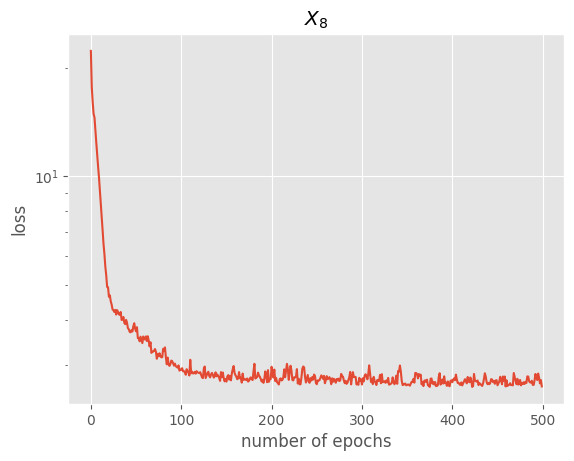

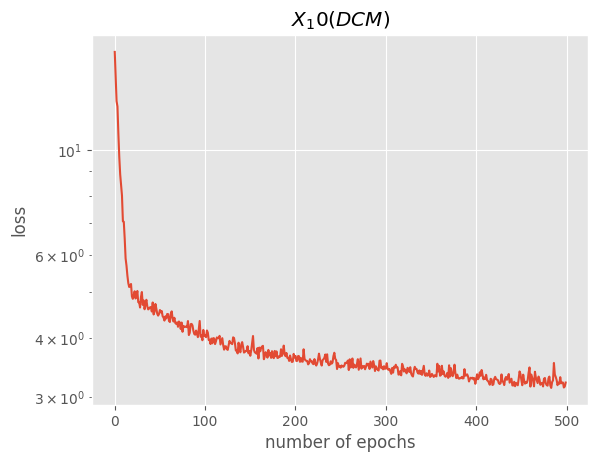

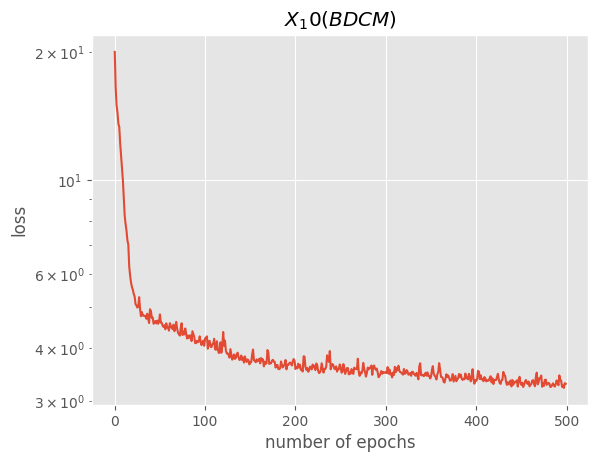

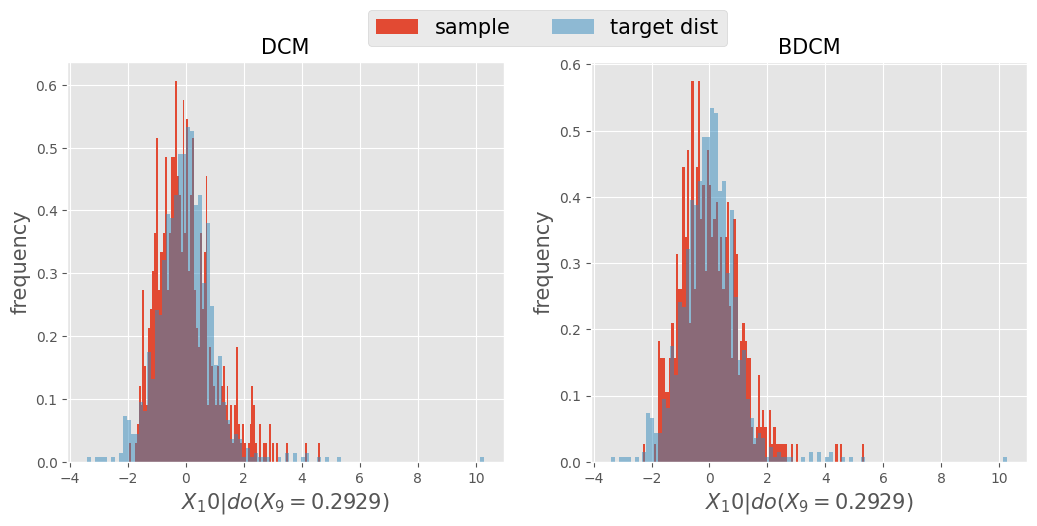

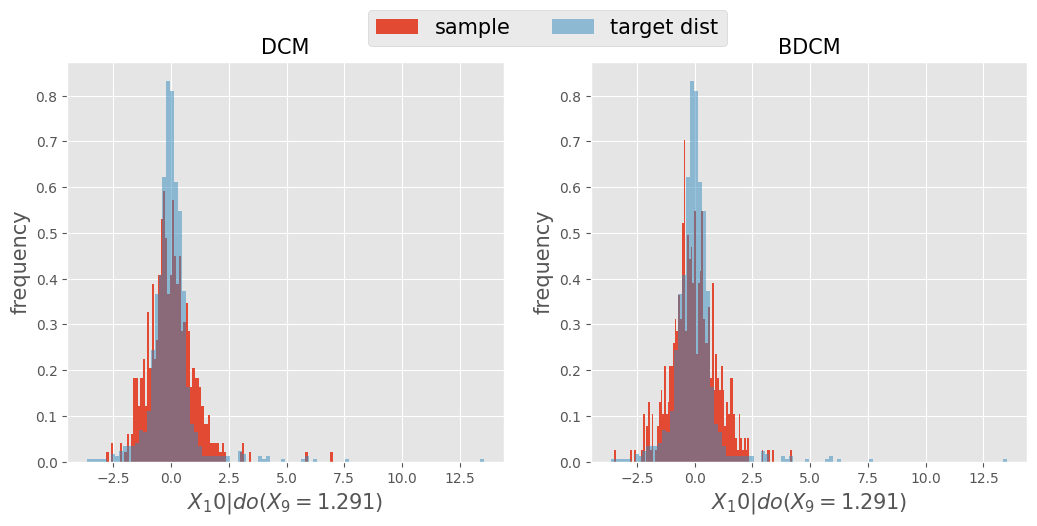

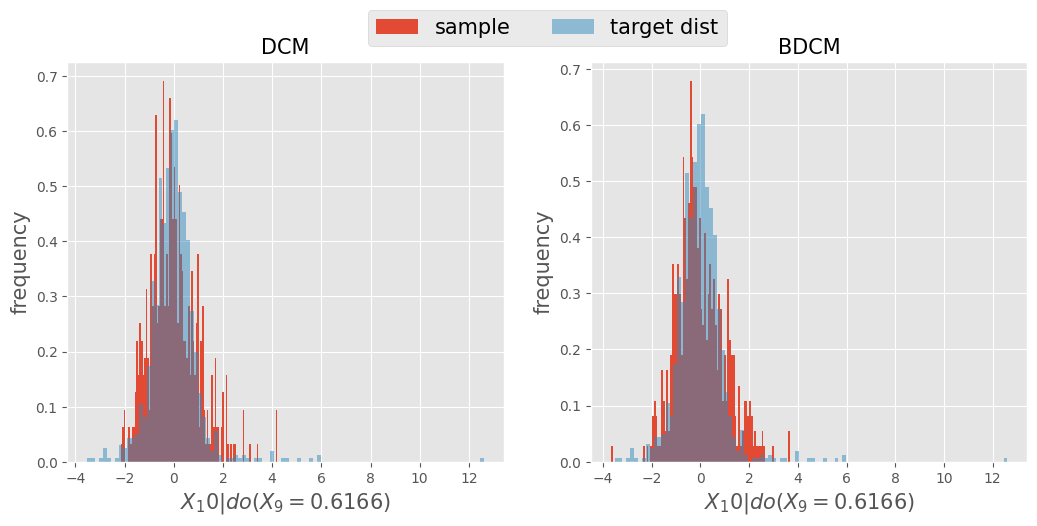

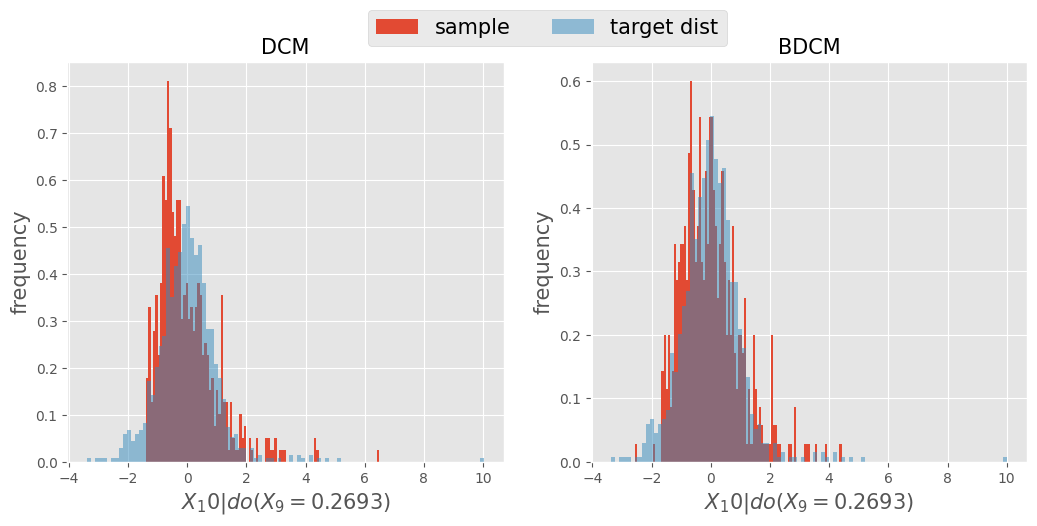

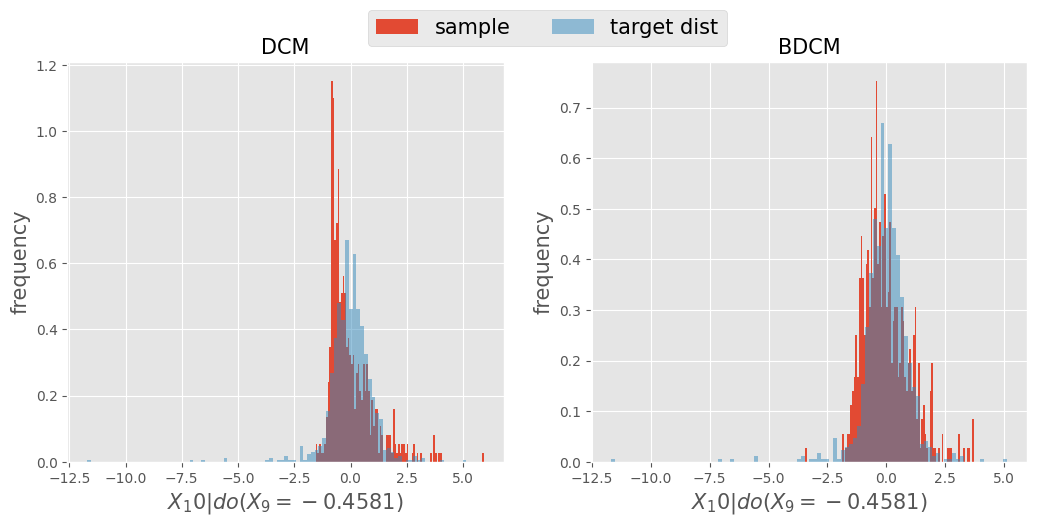

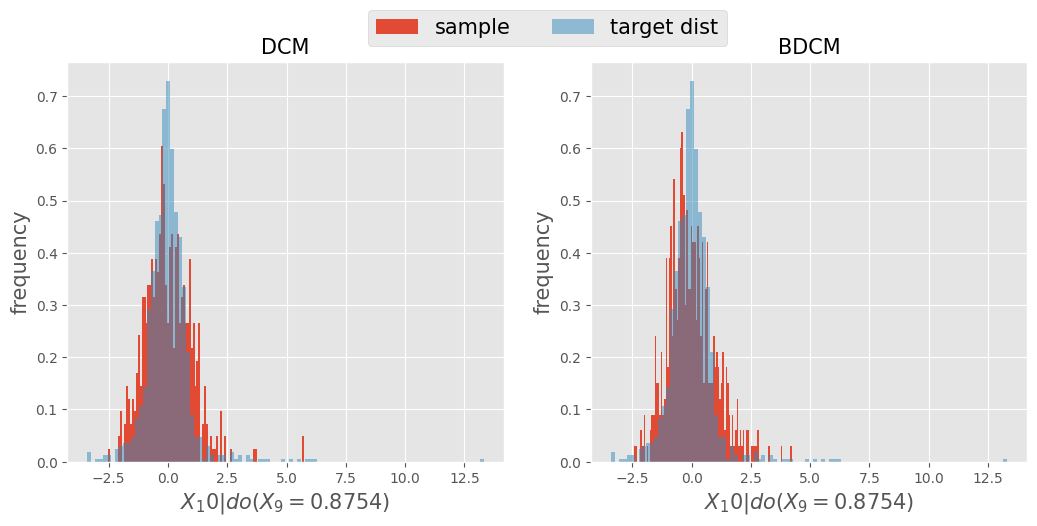

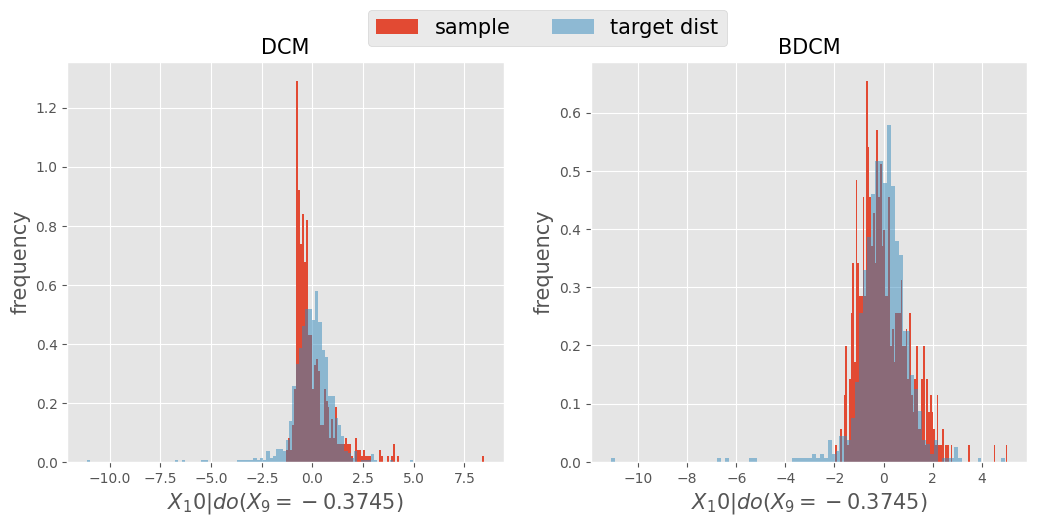

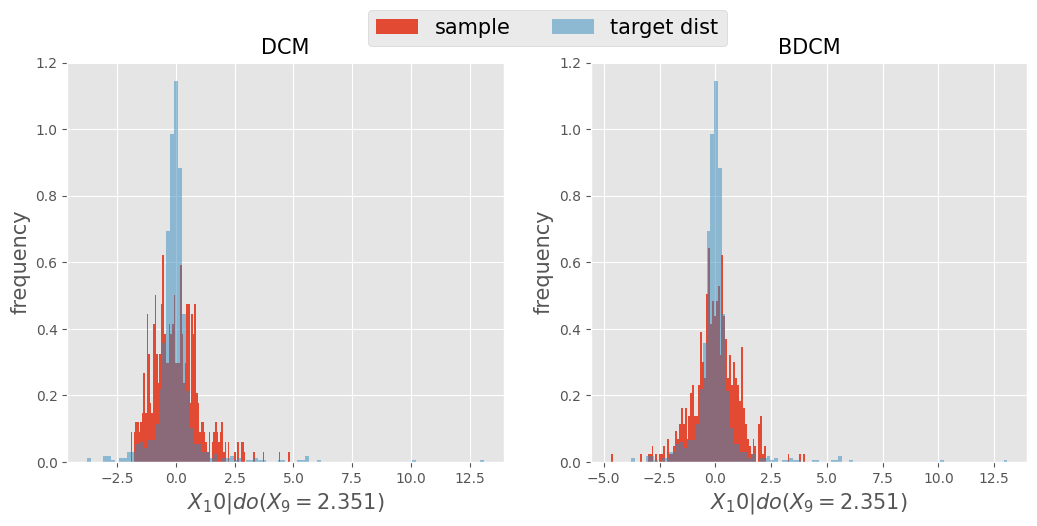

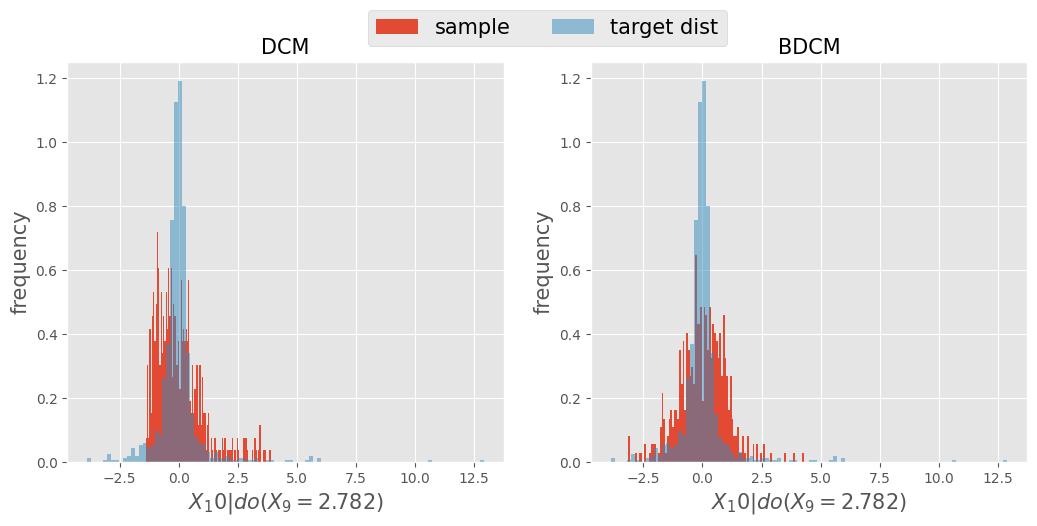

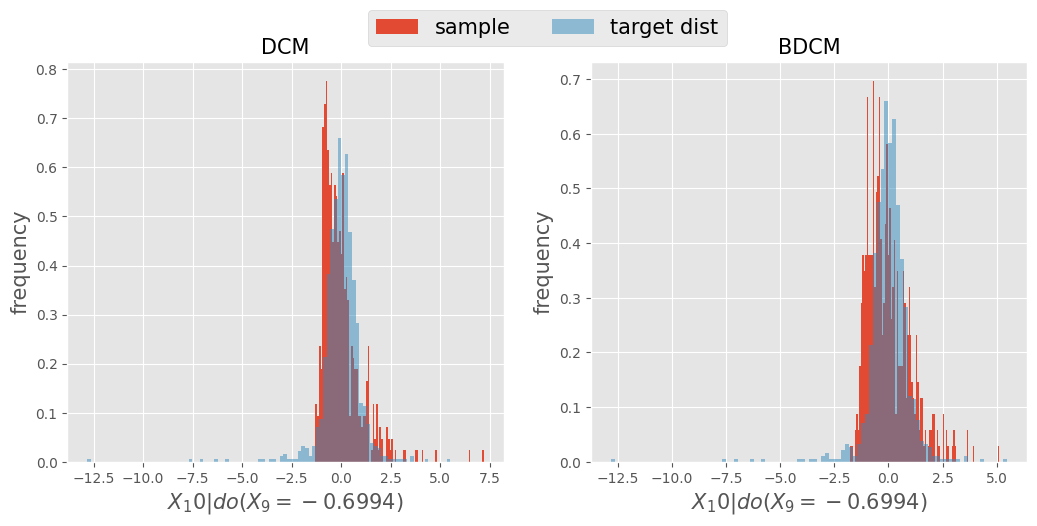

 20%|██        | 1/5 [12:36<50:24, 756.15s/it]

mean of MMD for DCM: 0.00195
standard deviation of MMD for DCM: 0.000751
mean of MMD for BDCM: 0.00234
standard deviation of MMD for BDCM: 0.00134


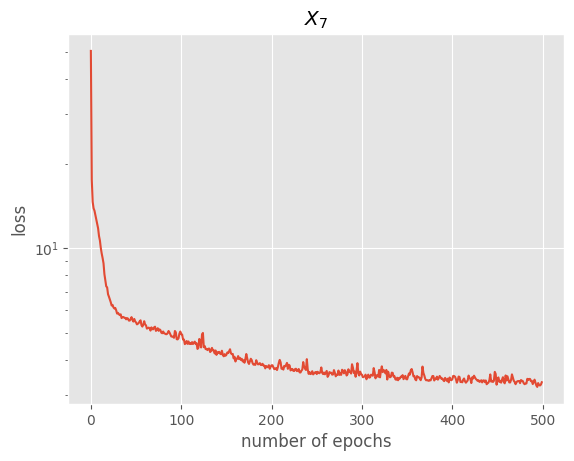

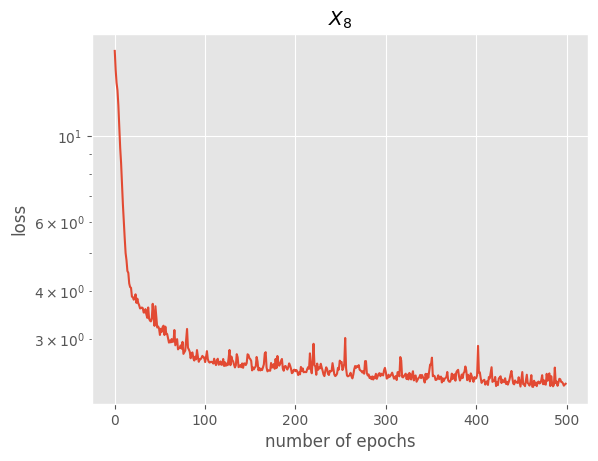

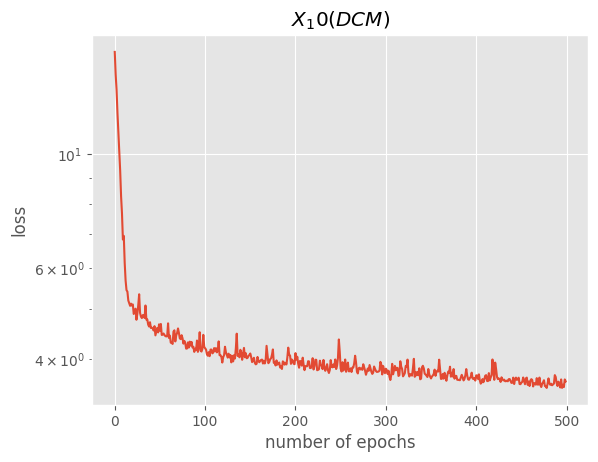

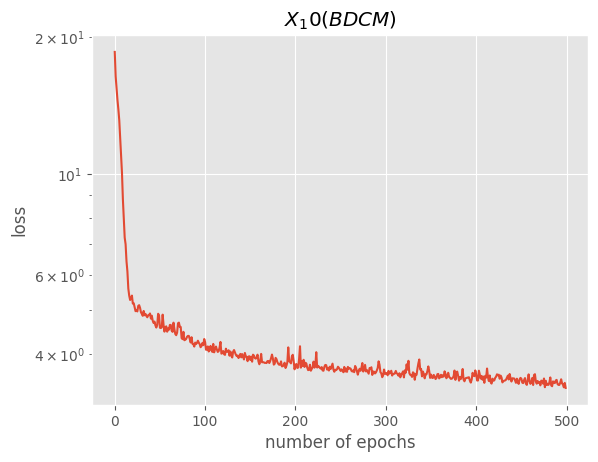

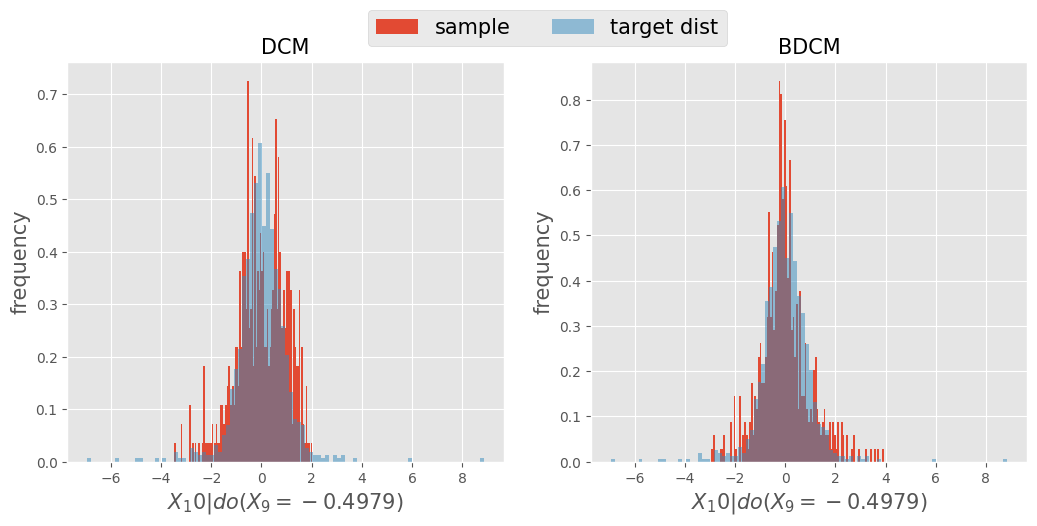

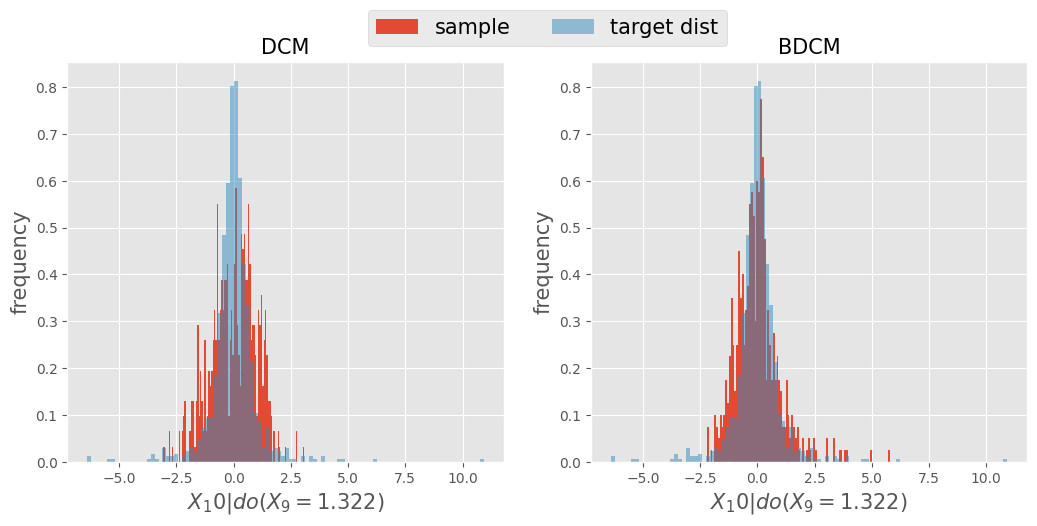

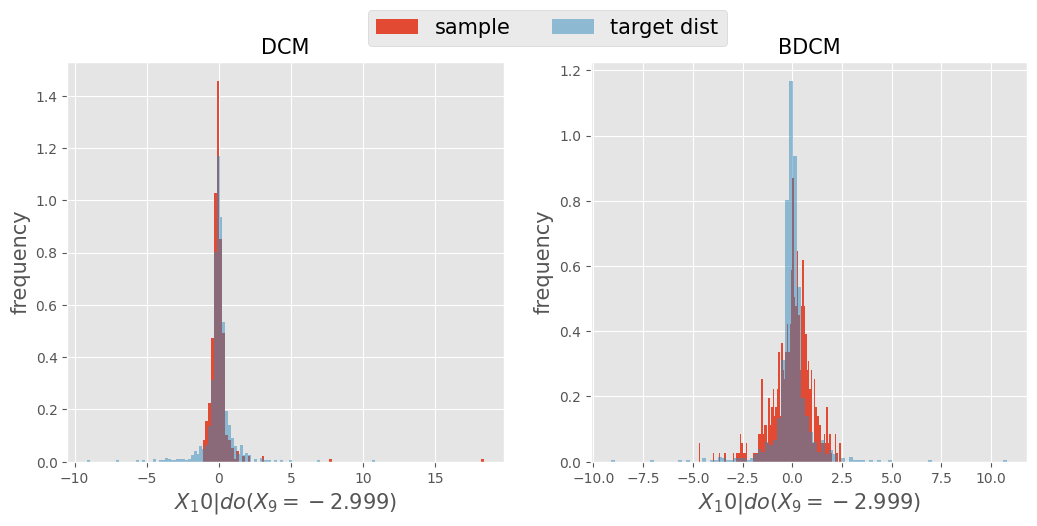

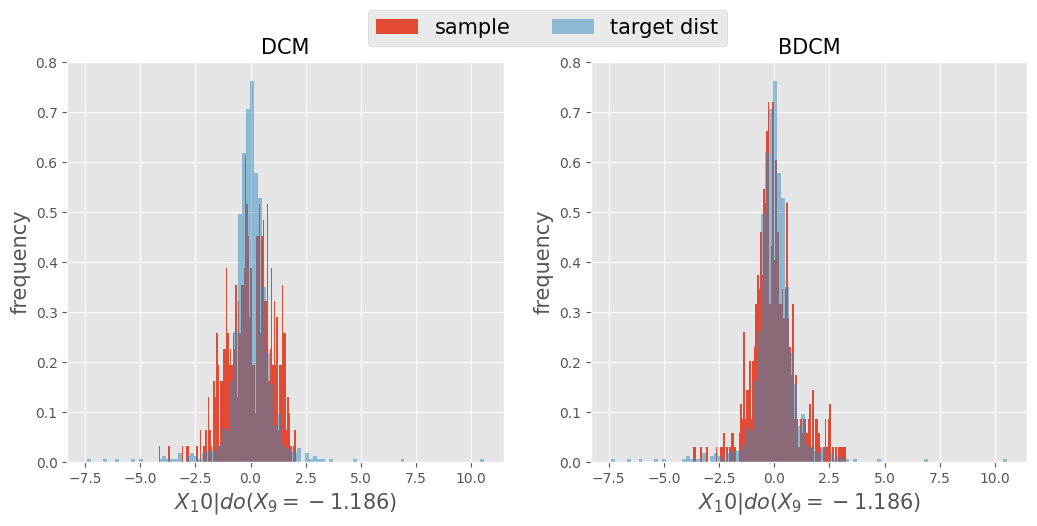

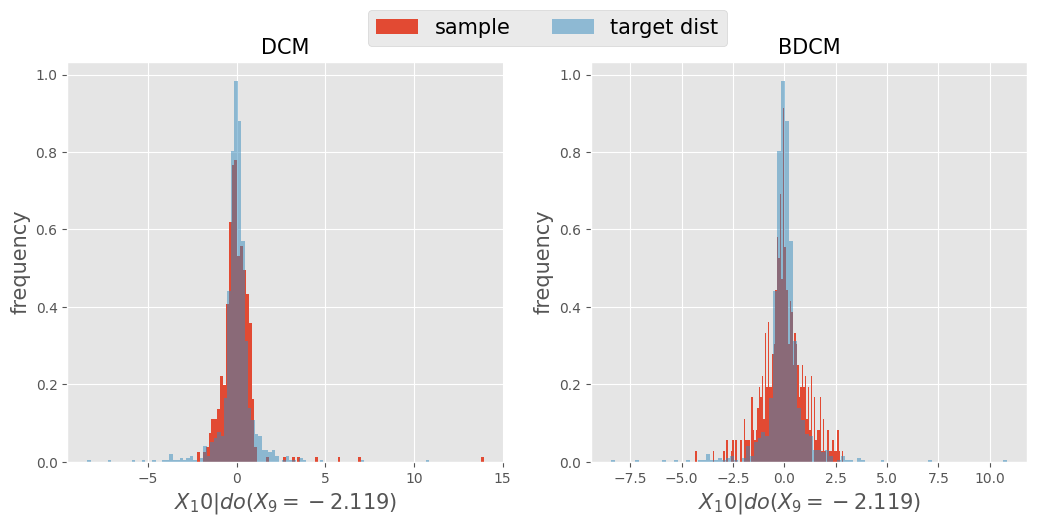

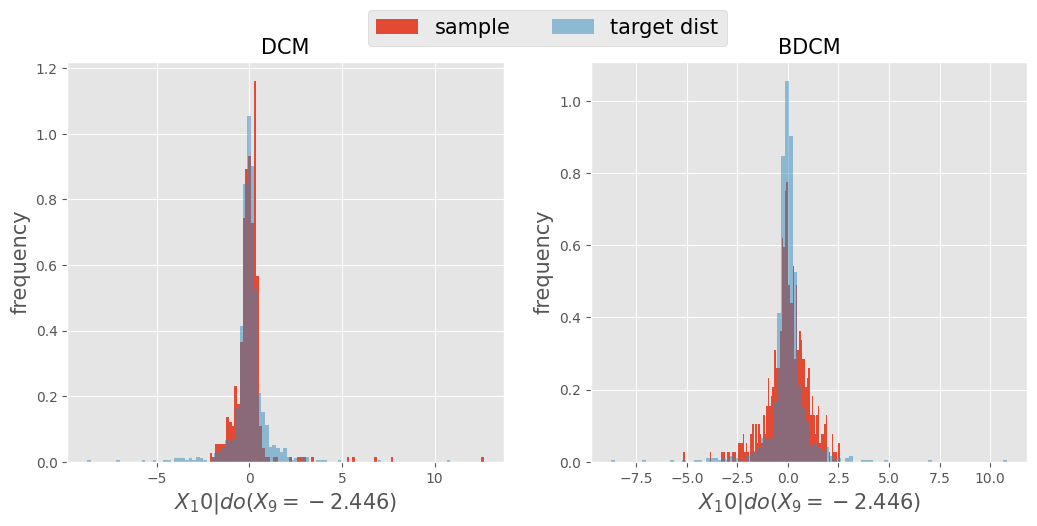

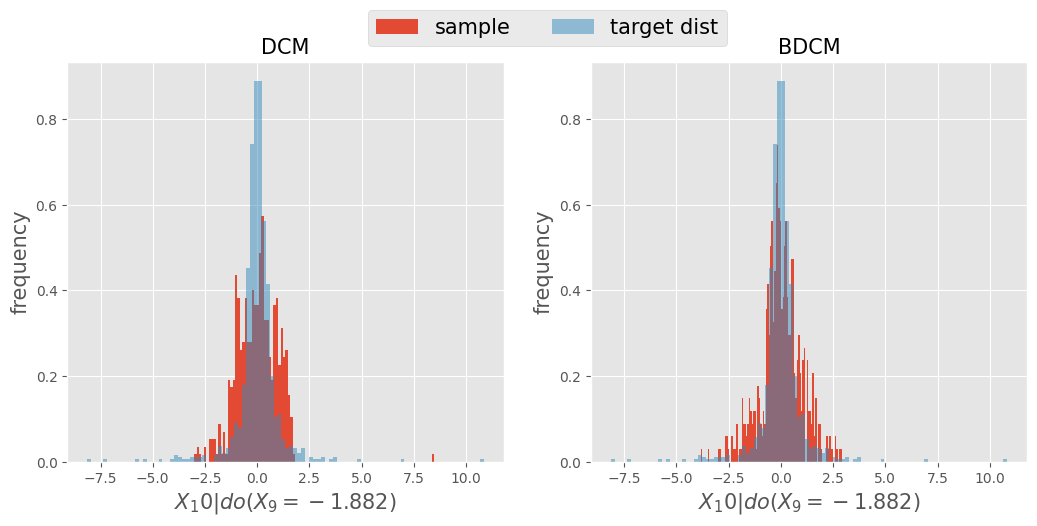

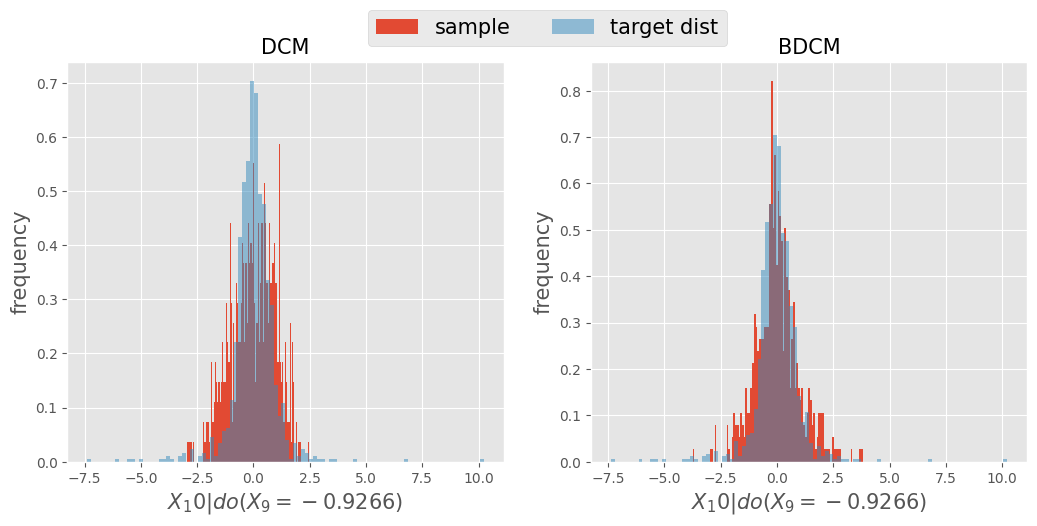

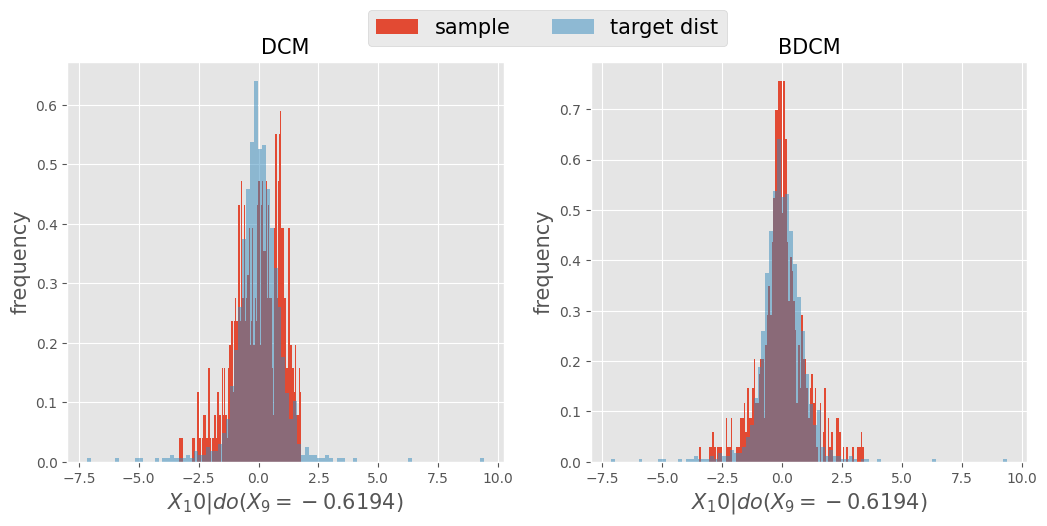

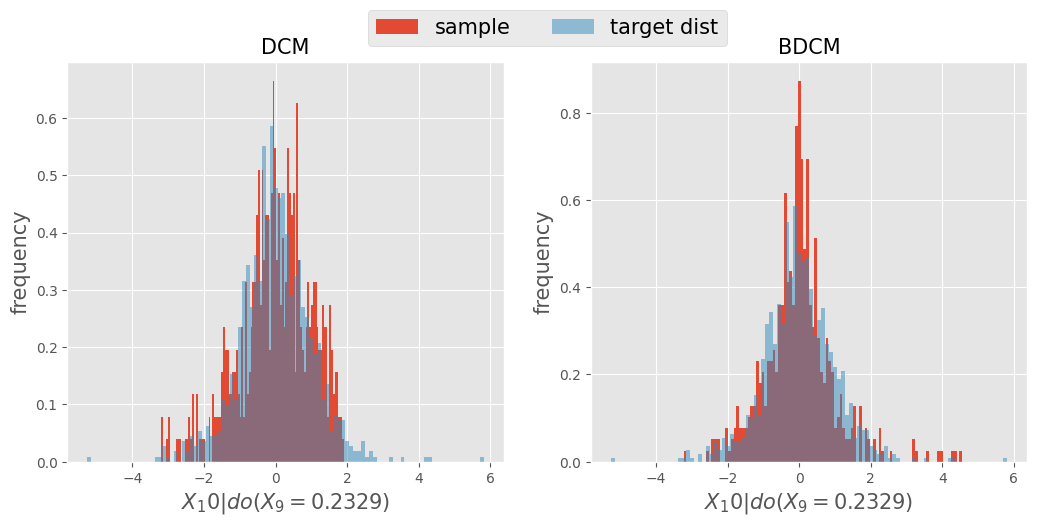

 40%|████      | 2/5 [25:17<37:57, 759.26s/it]

mean of MMD for DCM: 0.00122
standard deviation of MMD for DCM: 0.000588
mean of MMD for BDCM: 0.00122
standard deviation of MMD for BDCM: 0.000213


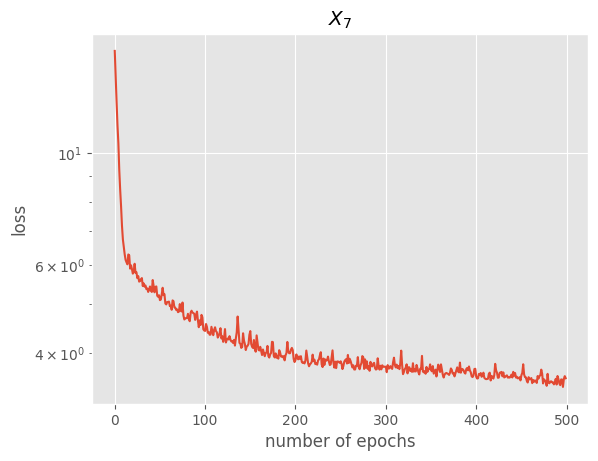

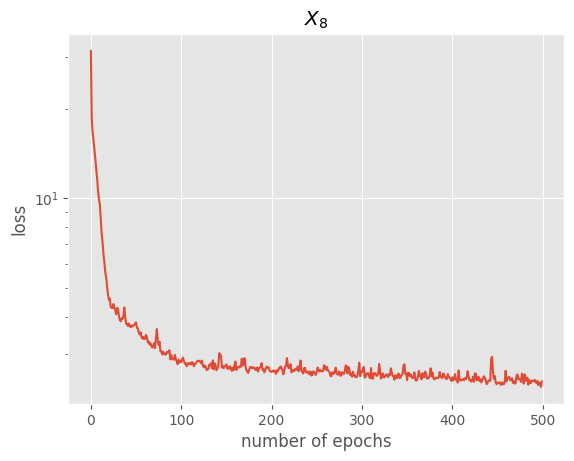

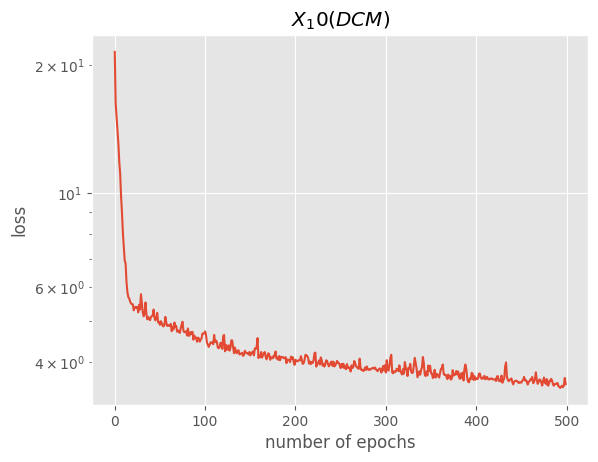

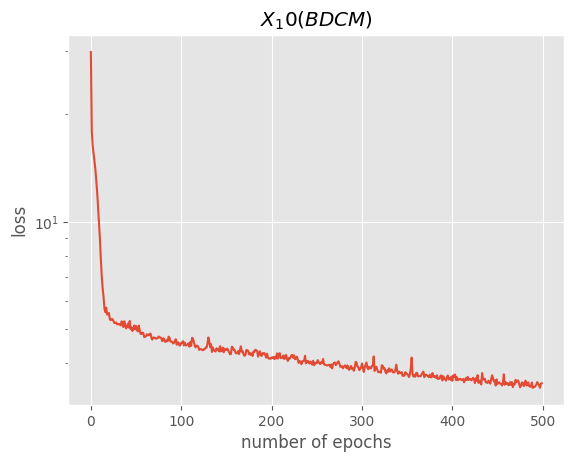

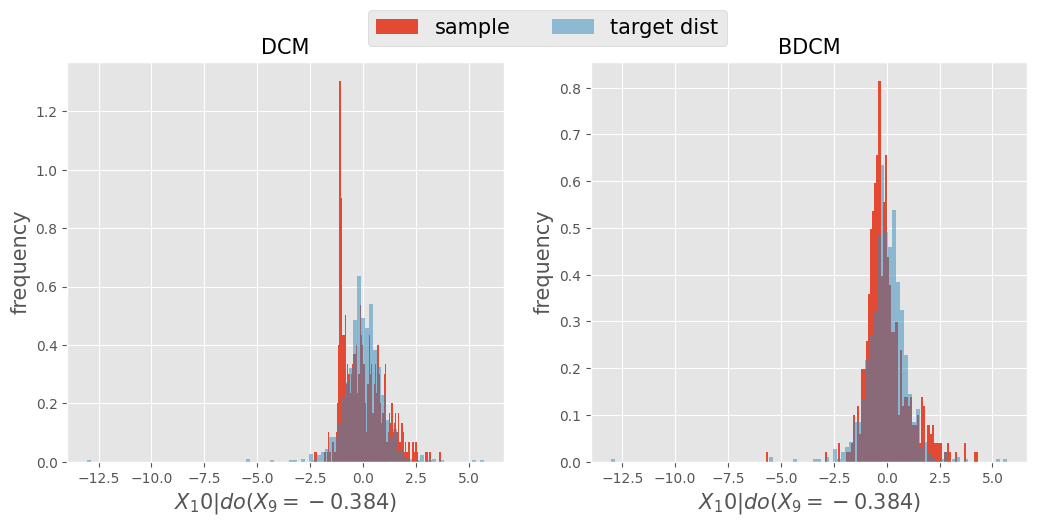

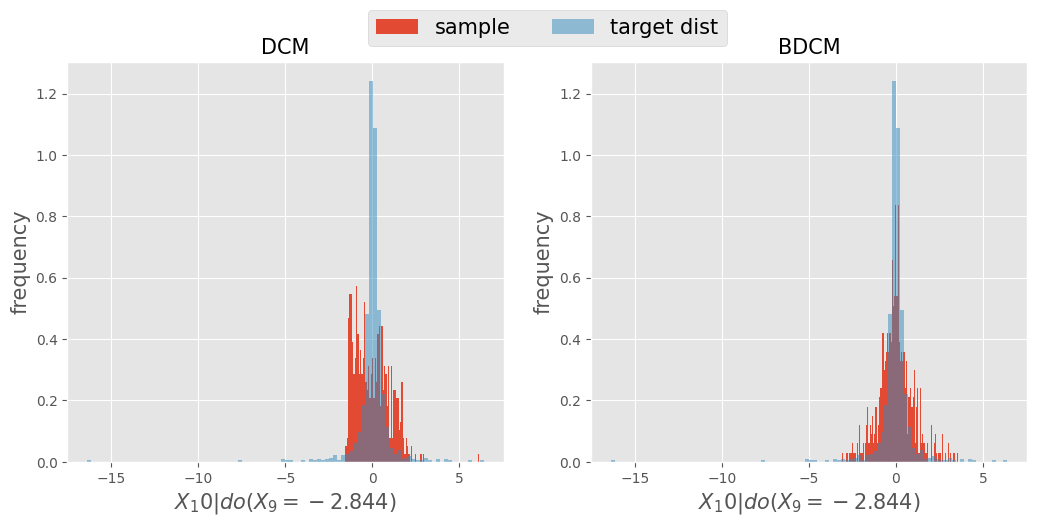

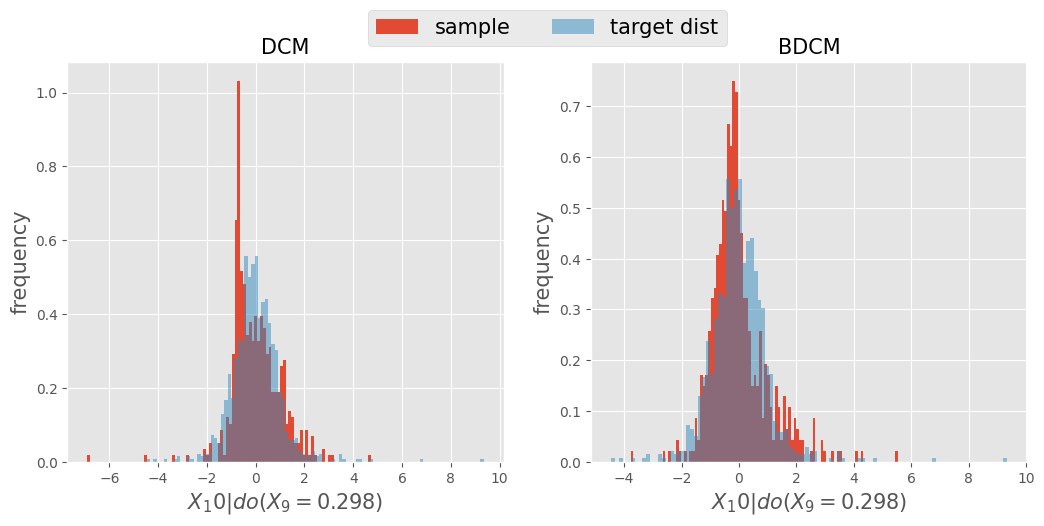

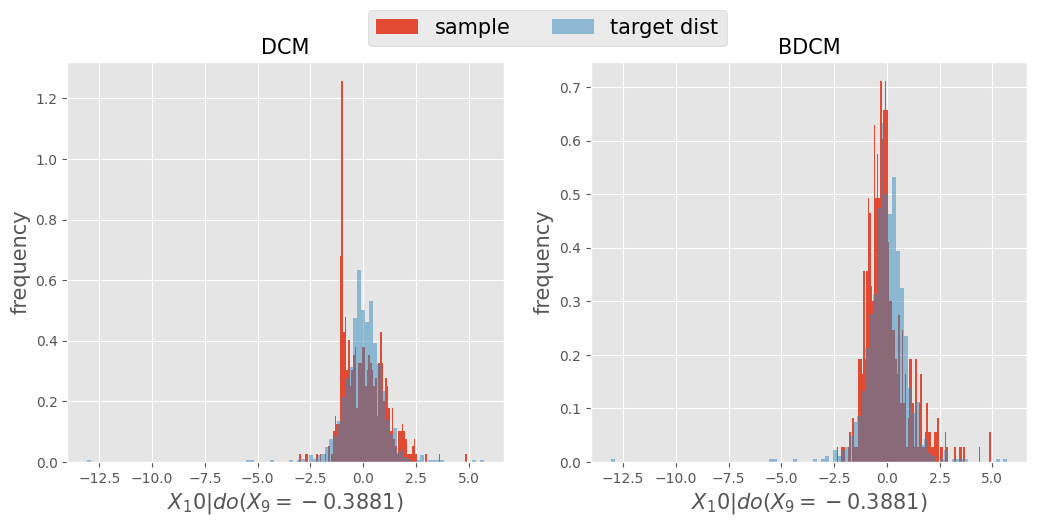

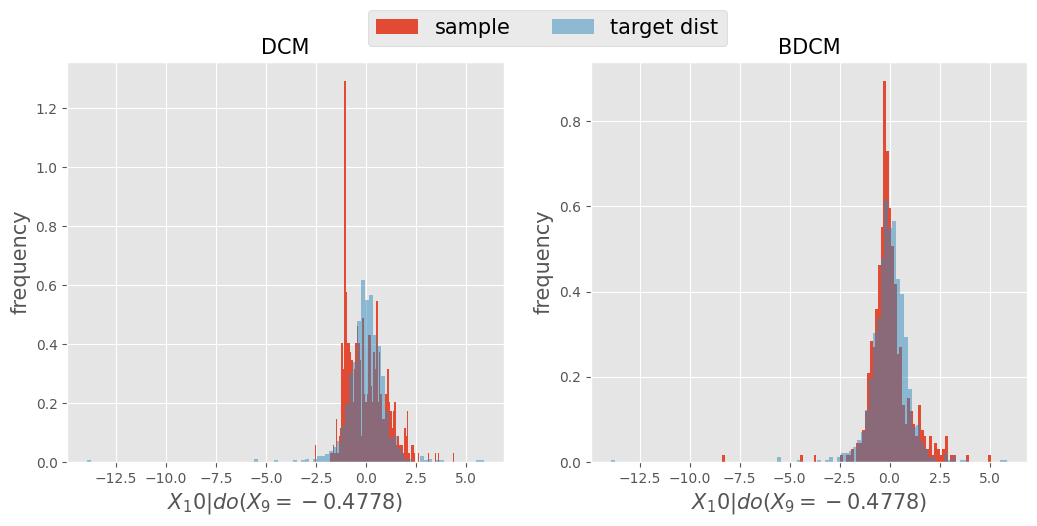

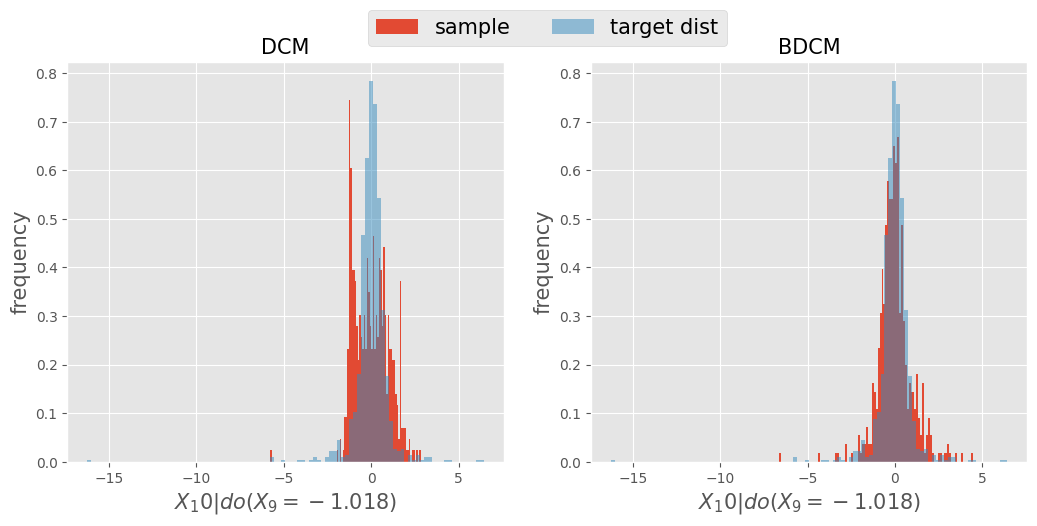

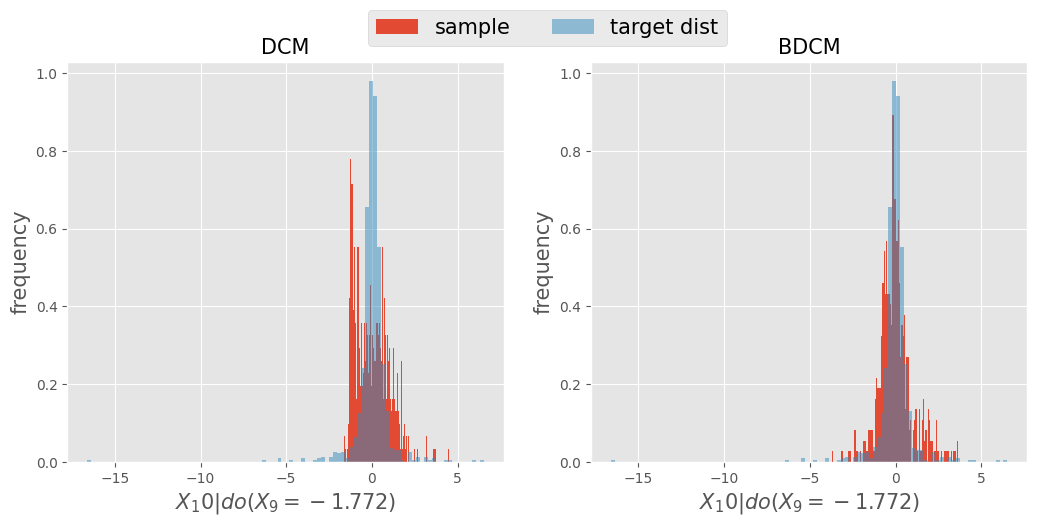

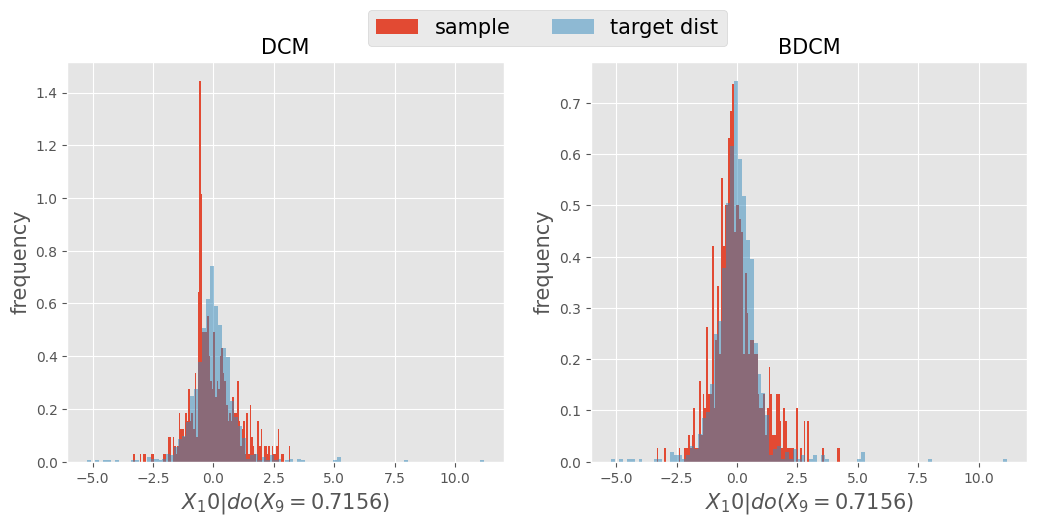

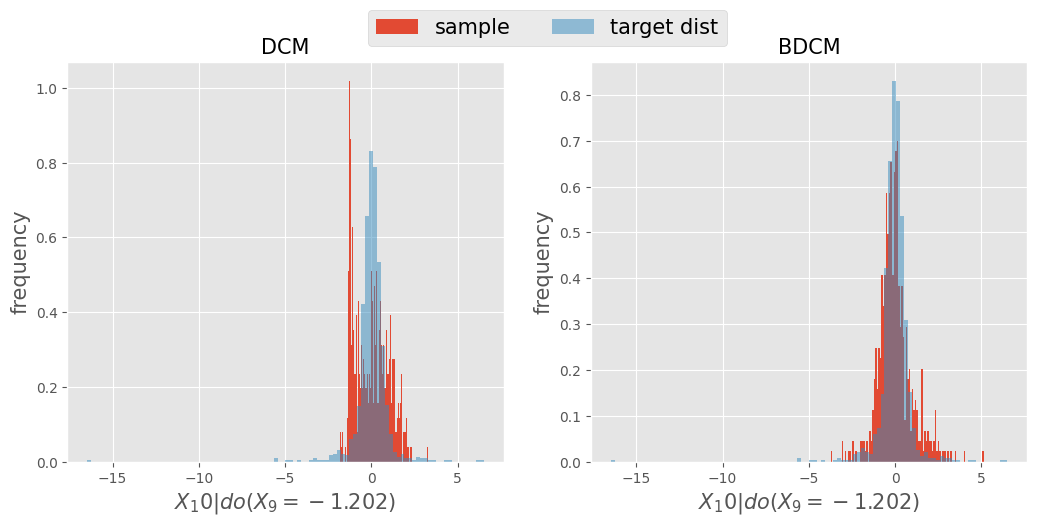

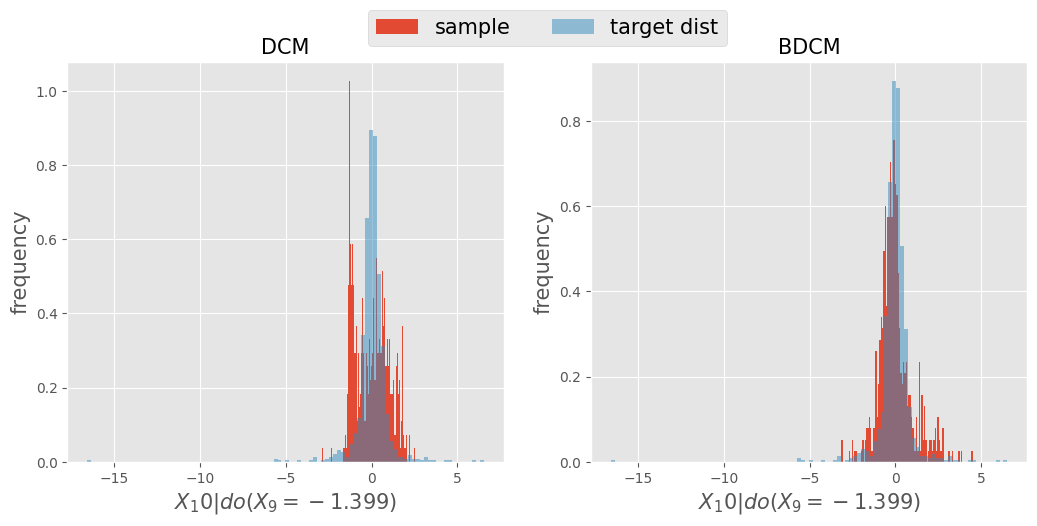

 60%|██████    | 3/5 [37:52<25:14, 757.35s/it]

mean of MMD for DCM: 0.00168
standard deviation of MMD for DCM: 0.000909
mean of MMD for BDCM: 0.00127
standard deviation of MMD for BDCM: 0.000767


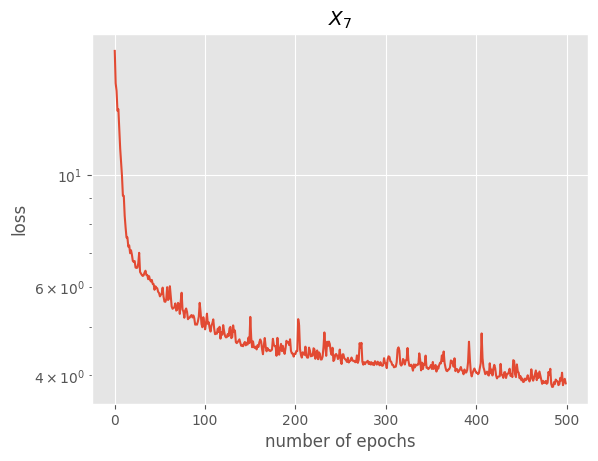

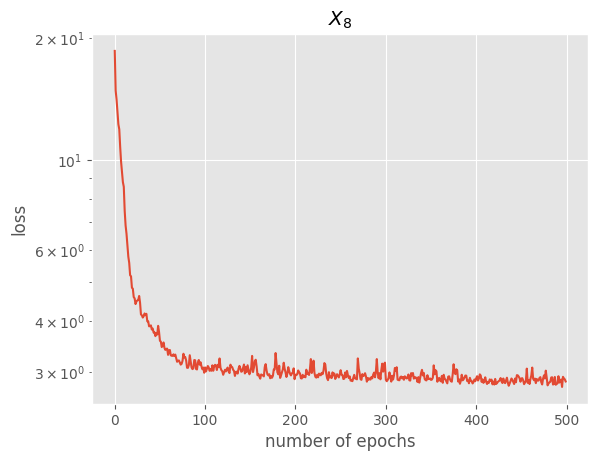

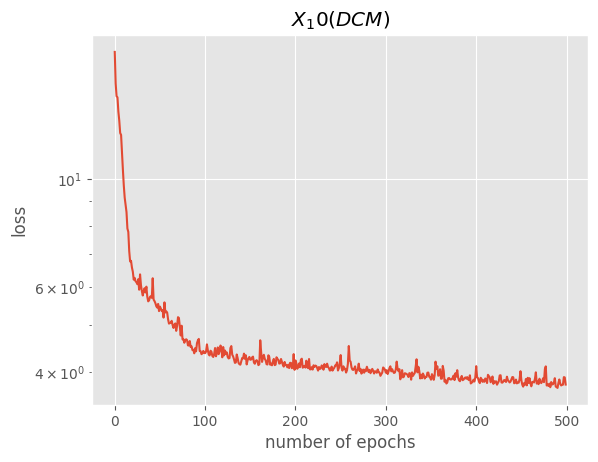

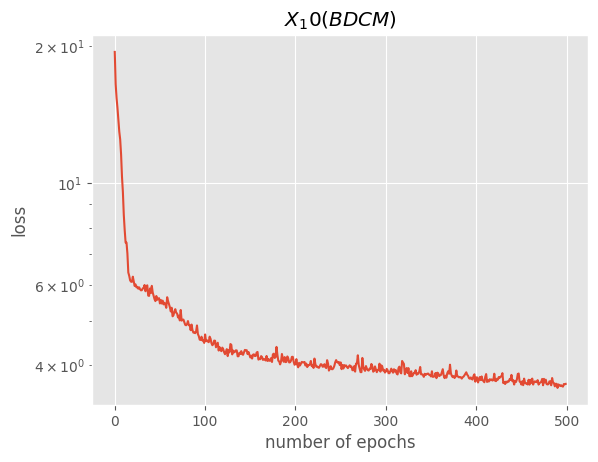

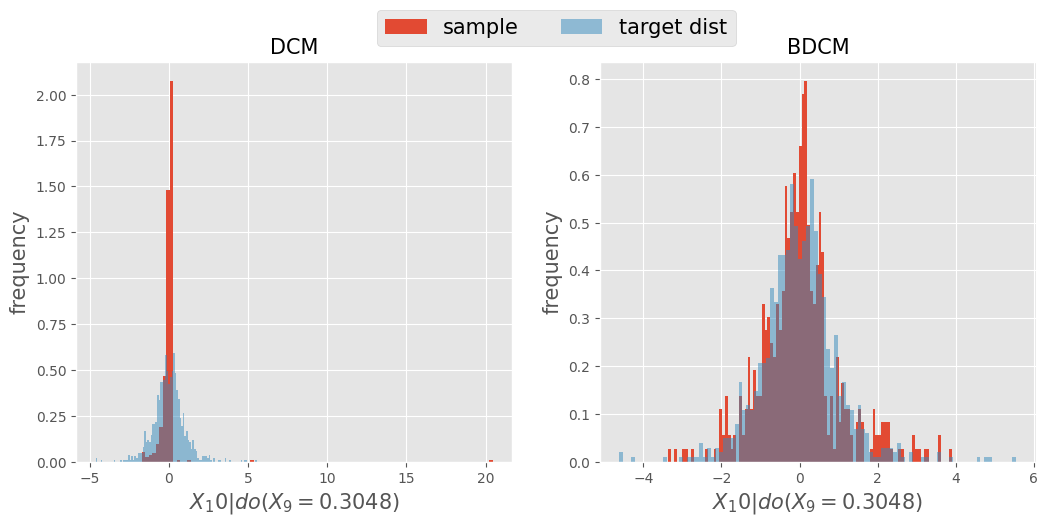

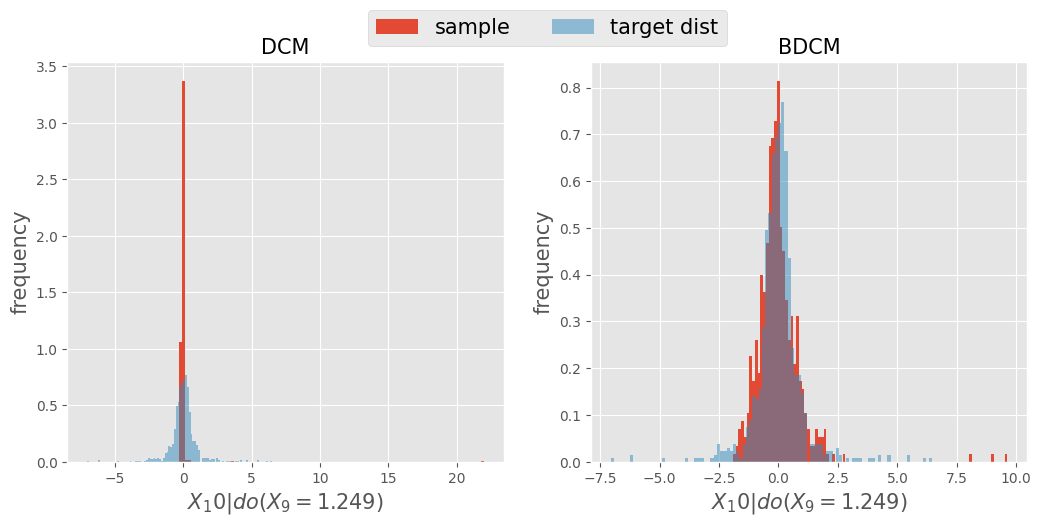

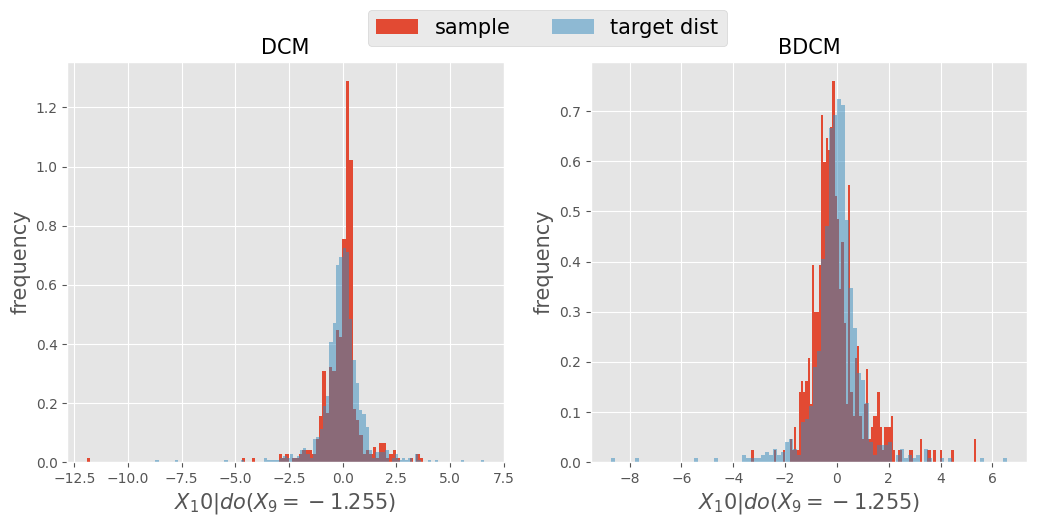

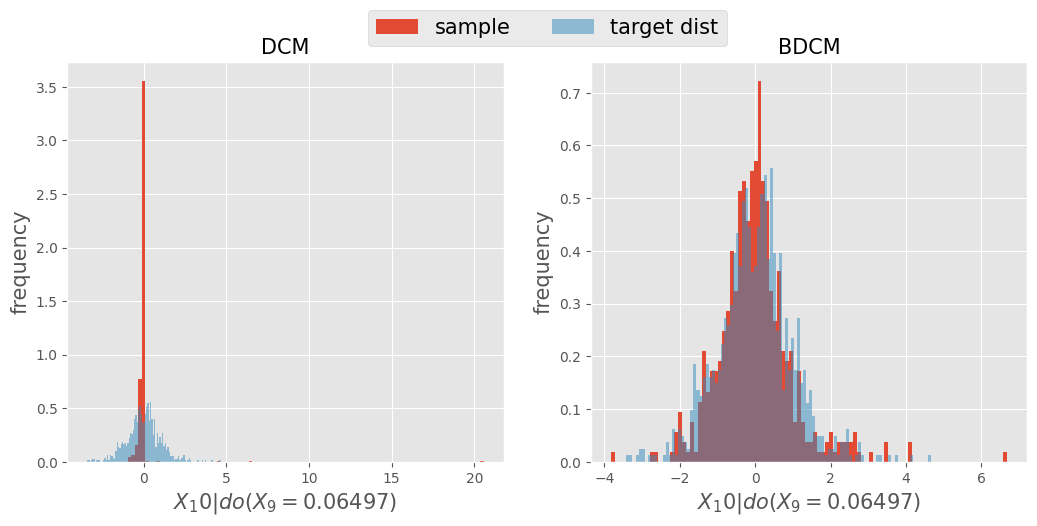

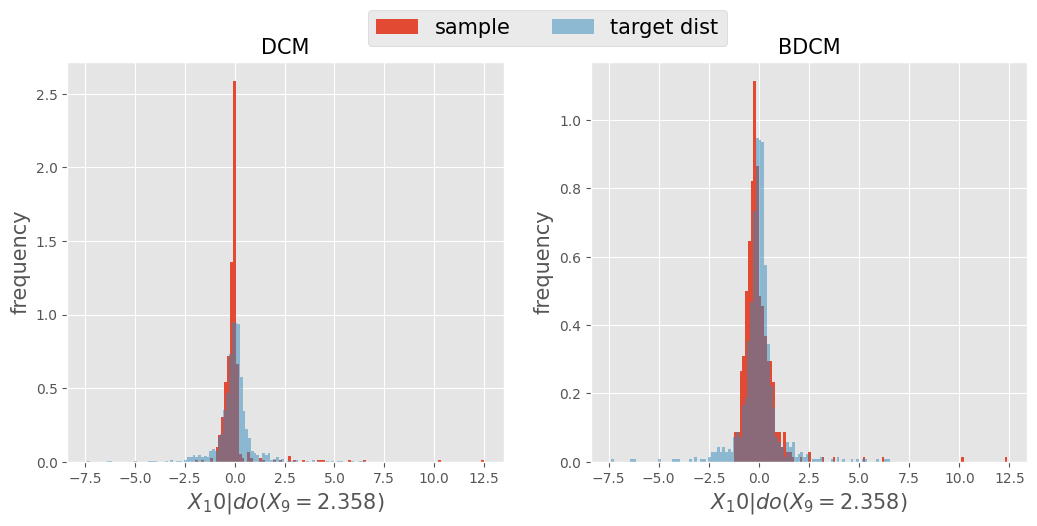

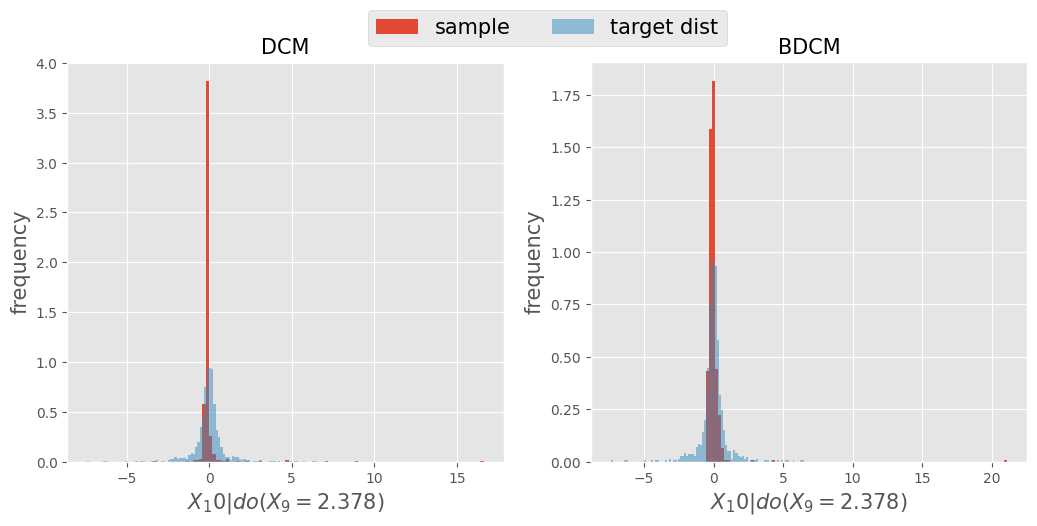

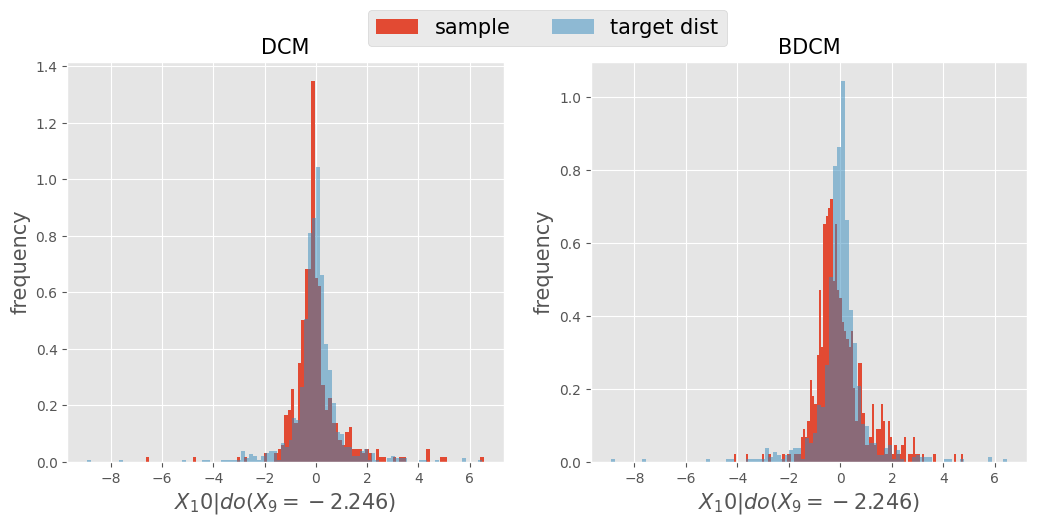

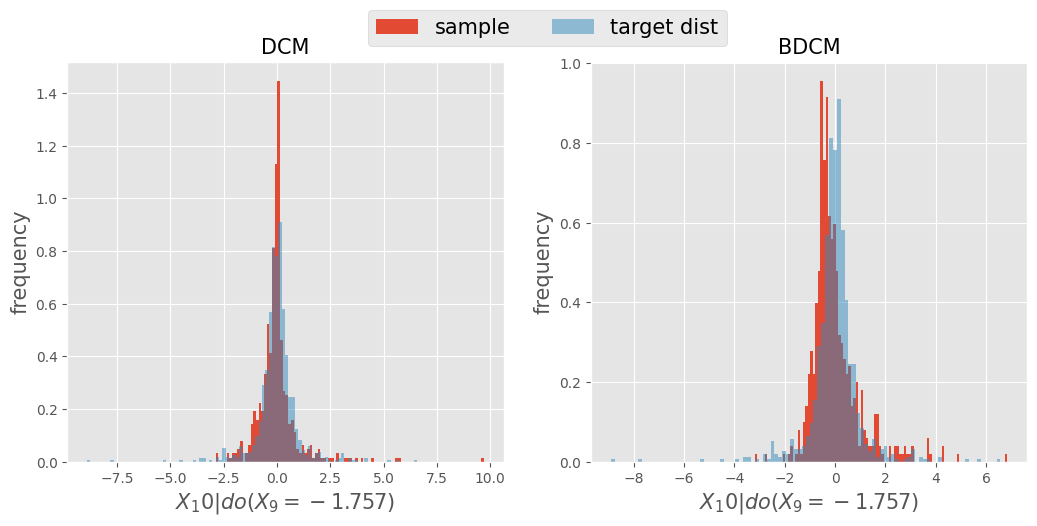

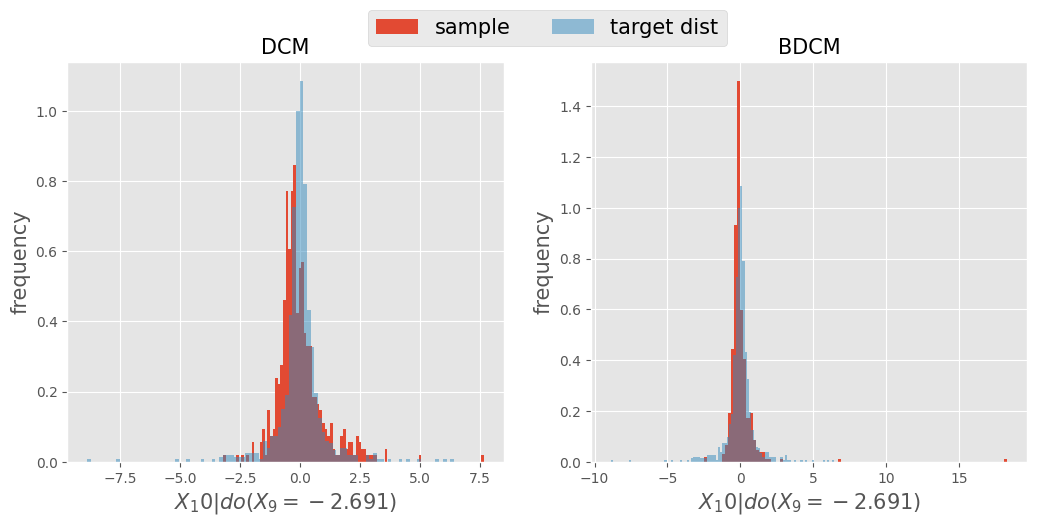

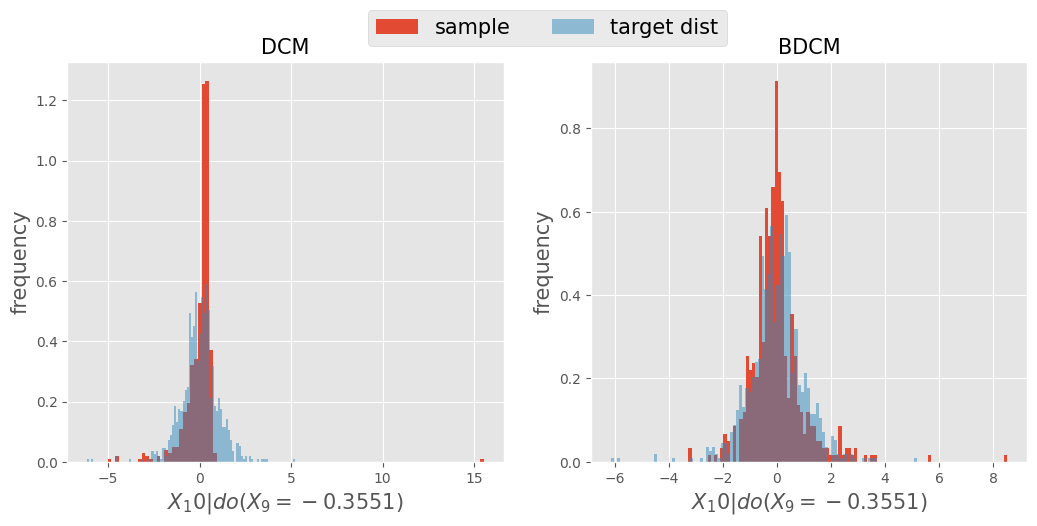

 80%|████████  | 4/5 [50:32<12:38, 758.31s/it]

mean of MMD for DCM: 0.00347
standard deviation of MMD for DCM: 0.0029
mean of MMD for BDCM: 0.00142
standard deviation of MMD for BDCM: 0.00155


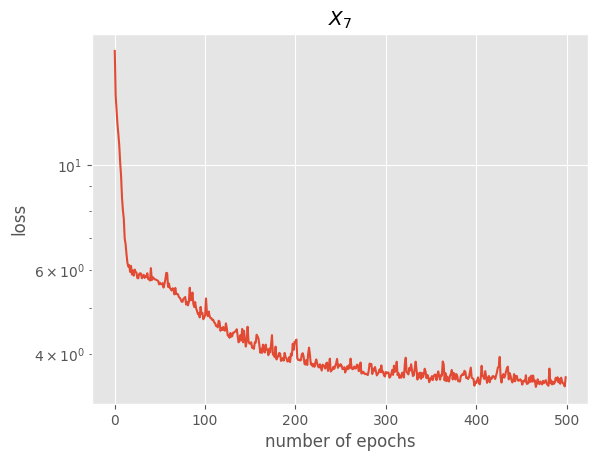

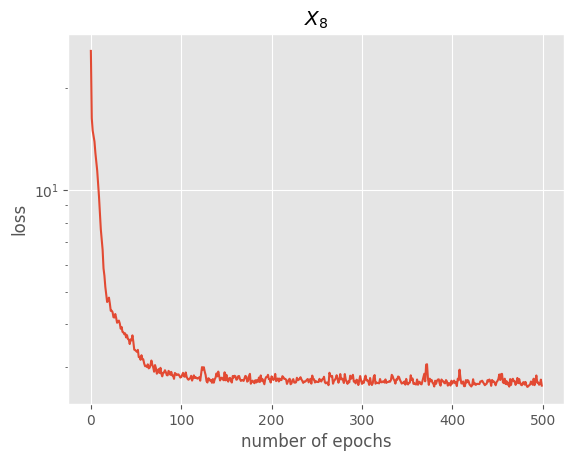

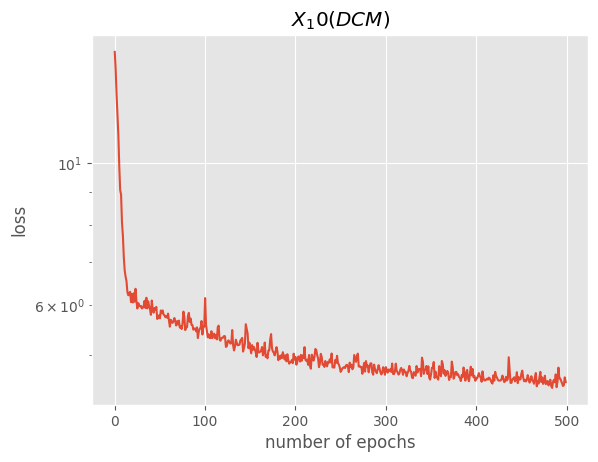

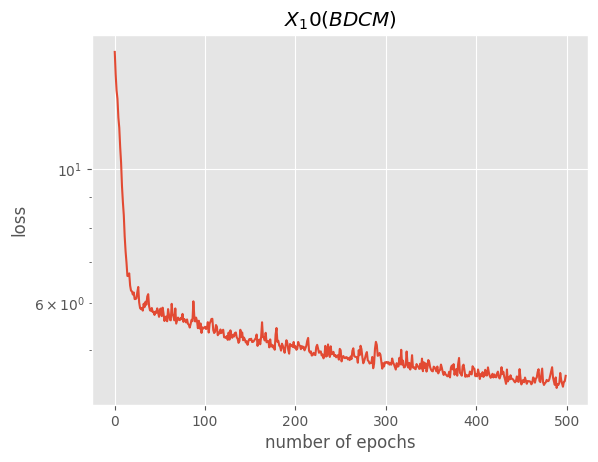

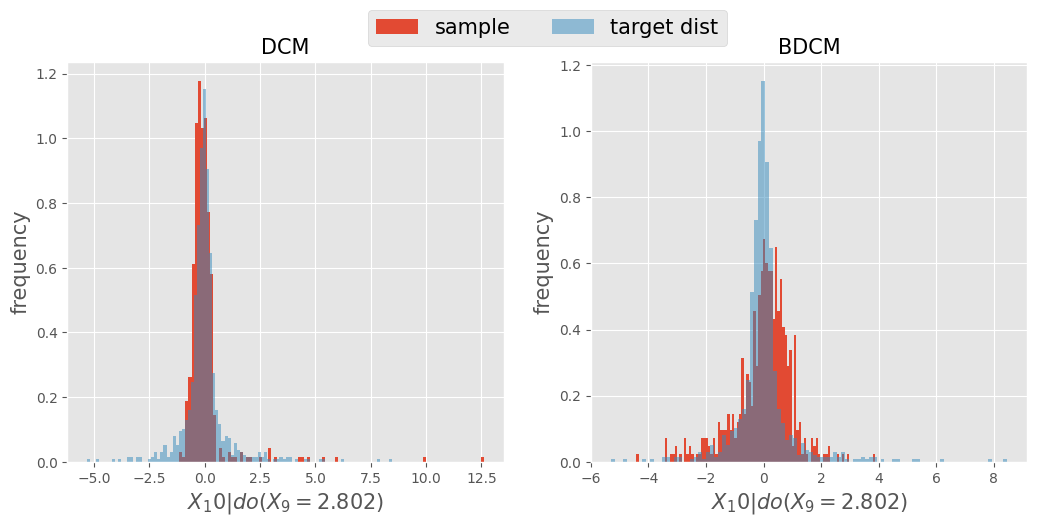

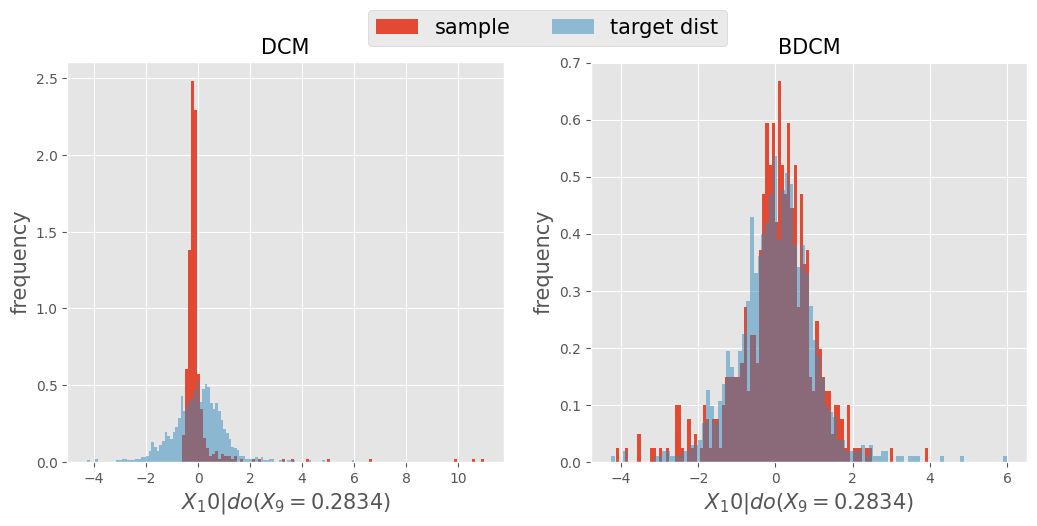

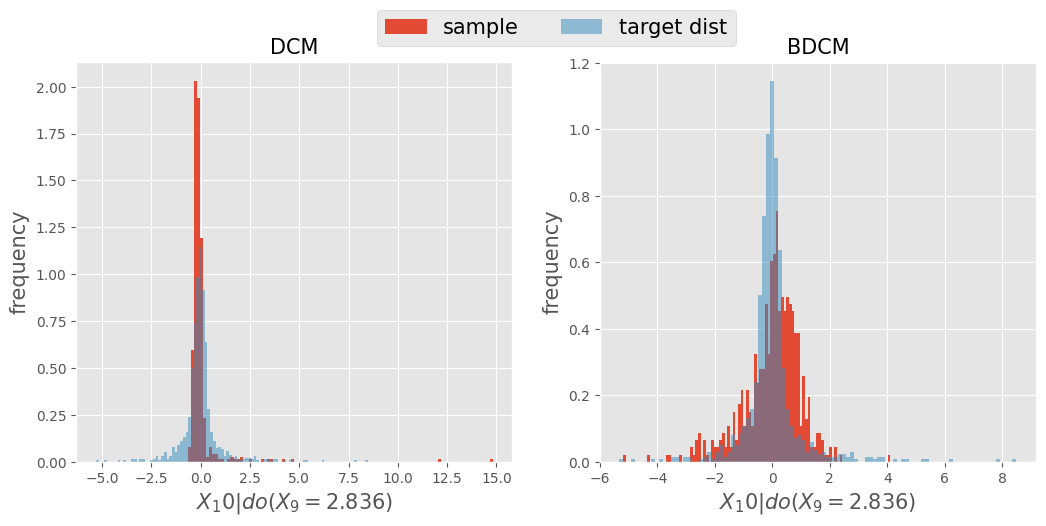

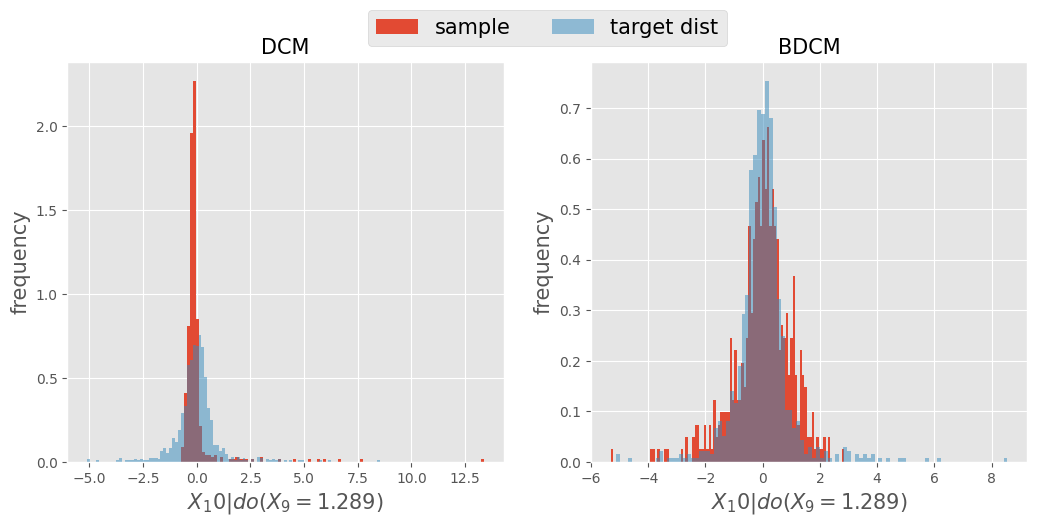

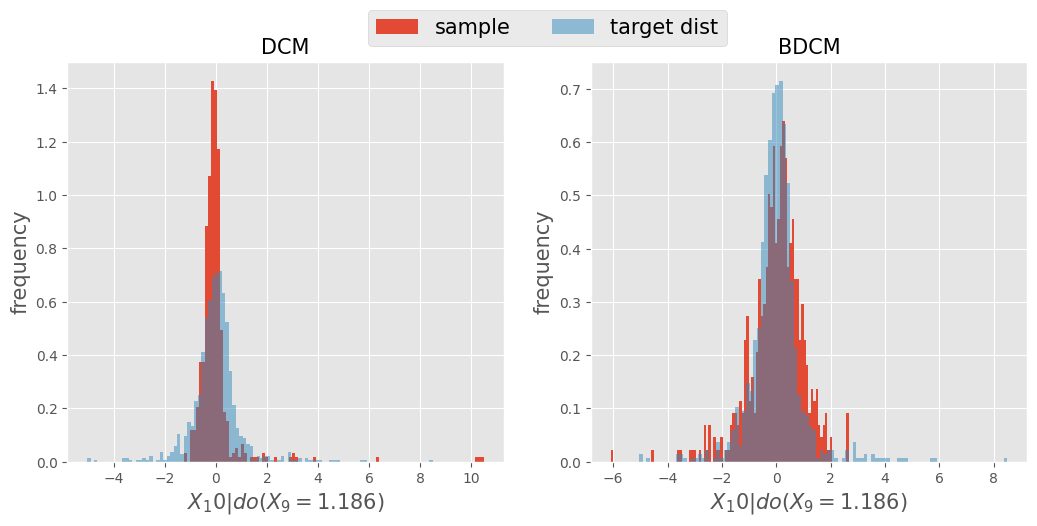

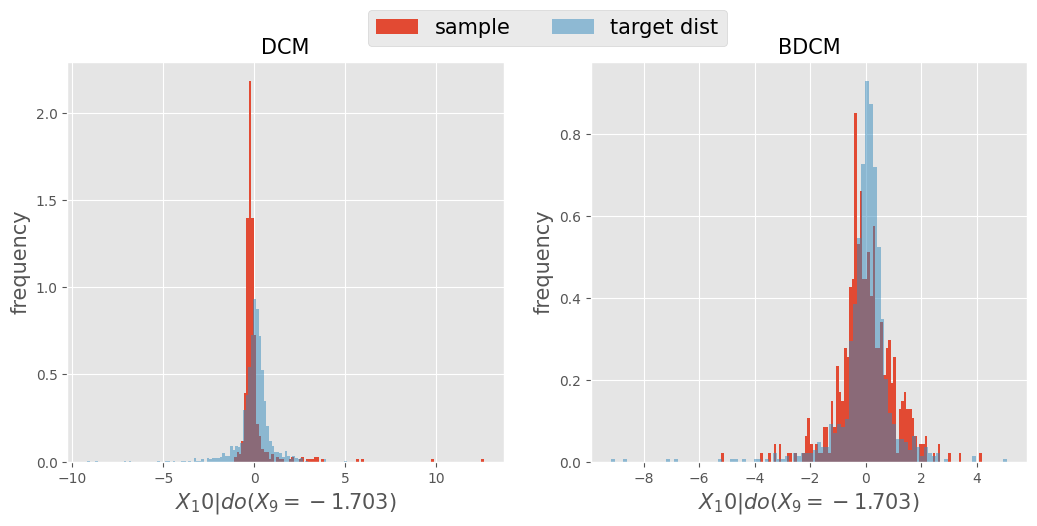

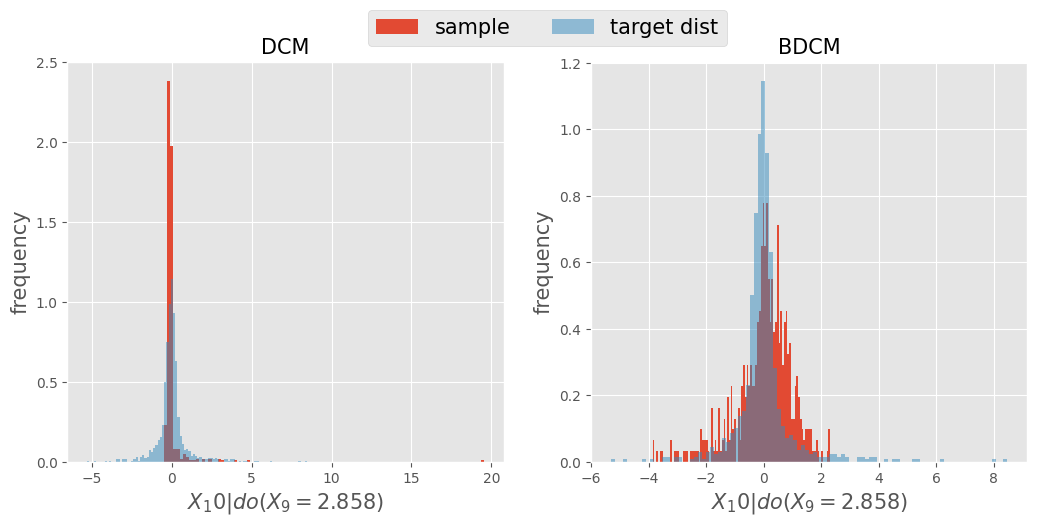

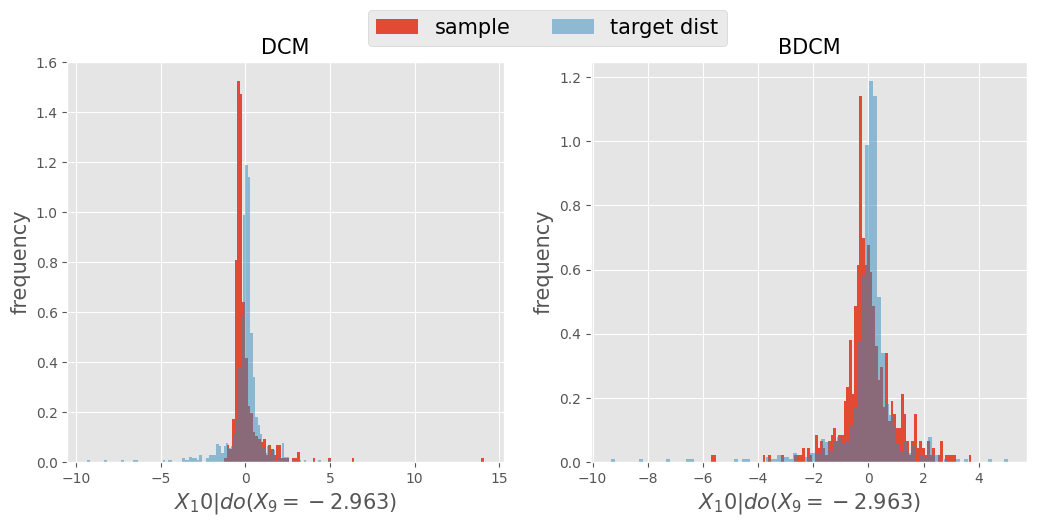

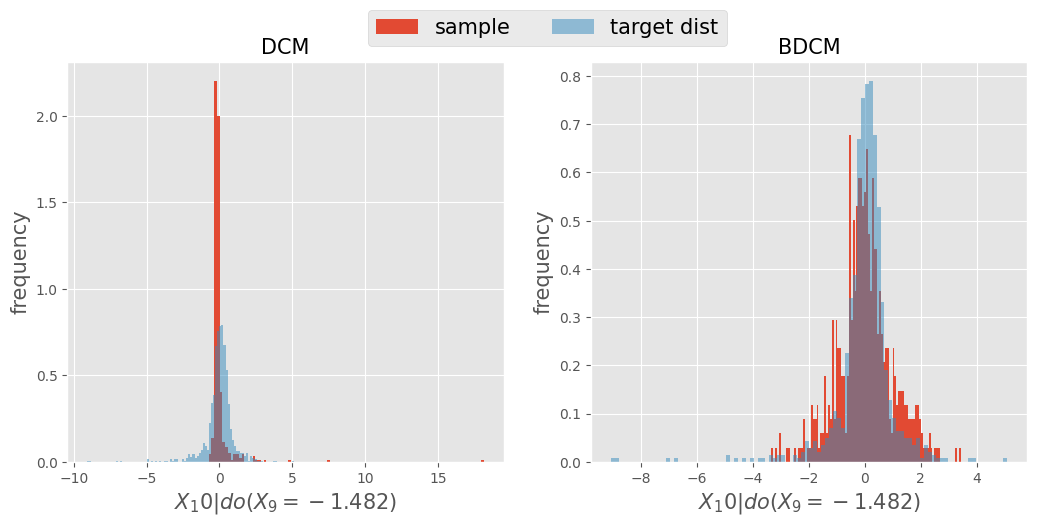

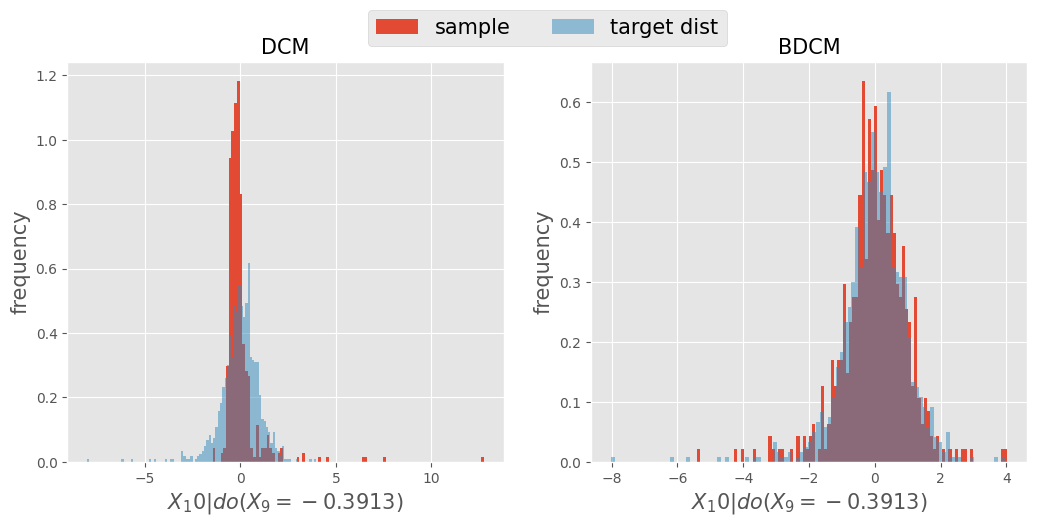

100%|██████████| 5/5 [1:03:17<00:00, 759.44s/it]

mean of MMD for DCM: 0.00359
standard deviation of MMD for DCM: 0.00125
mean of MMD for BDCM: 0.00106
standard deviation of MMD for BDCM: 0.000575
mean of all MMD for DCM: 0.00238
standard deviation of all MMD for DCM: 0.00181
mean of all MMD for BDCM: 0.00146
standard deviation of all MMD for BDCM: 0.00111


In [3]:
# Define the structual equation
# X_i = f_i(X_{pa_i}) + U_i

def structural_eq(u, ind, x):
  if ind == 0:
    output = u
  elif ind == 1:
    output = u
  elif ind == 2:
    output = (np.sqrt(abs(x[0]) * (abs(u) + 0.1))) / 2 + abs(x[0]) + u / 5
  elif ind == 3:
    output = (u * (abs(x[1]) + 0.3)) / 5 + u
  elif ind == 4:
    output = -1 / (1 + (abs(u) + 0.1) * np.exp(-x[2]))
  elif ind == 5:
    output = (u * (abs(x[3]) + 0.3)) / 5 + u
  elif ind == 6:
    output = -(np.sqrt(abs(x[2]) * (abs(u) + 0.1))) / 2 + abs(x[2]) + u / 5
  elif ind == 7:
    output = 3 * x[3] + 0.1 + u
  elif ind == 8:
    output = x[4] ** 3 * x[7] + x[4] + x[7] + u
  elif ind == 9:
    output = x[5] ** 2 * x[6] * x[8] + x[5] * x[6] + u
  return normalize(output)

SCM4(structural_eq=structural_eq, simple_or_complex = "complex")